<a href="https://colab.research.google.com/github/SLTH-Project/ThaiSignLanguage/blob/main/Implemented_Indian_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy import expand_dims
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

import tensorflow as tf

from PIL import Image 
from PIL import ImageFilter 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage
#from scipy.misc import imread

import os
import cv2

#Split folder

In [ ]:
!pip install split_folders

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders 

In [ ]:
root_dir = "/content/drive/My Drive/All Dataset/Dataset09/Dataset_0-9_A-Z/" 
os.makedirs('/content/drive/My Drive/All Dataset/Dataset09/Dataset0-9_test')

In [ ]:
splitfolders.ratio(root_dir, output="/content/drive/My Drive/All Dataset/Dataset09/Dataset0-9_test", seed=1337, ratio=(.8, 0.1, 0.1)) # train test split 

Copying files: 18408 files [05:46, 53.13 files/s]


#Make dataset [ImageDataGenerator]

In [ ]:
root_dir = '/content/drive/My Drive/All Dataset/Dataset09/'
dataset_dir = os.path.join(root_dir, 'Dataset0-9_test')
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
val_dir = os.path.join(dataset_dir, 'val')

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
train_generator = train_datagen.flow_from_directory(train_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 14723 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
test_generator = train_datagen.flow_from_directory(test_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 1848 images belonging to 10 classes.


In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
val_generator = train_datagen.flow_from_directory(val_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 1837 images belonging to 10 classes.


In [ ]:
img_size = 128

# Load training set / test set / val set

In [ ]:
# Load training set and test set
labels = ['0', '1', '2','3','4','5','6','7','8','9']
def get_data(data_dir):
    image_list = [] 
    label_list = []    
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format                
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                image_list.append(resized_arr)
                label_list.append(class_num)
            except Exception as e:
                print(e)
    return np.array(image_list), np.array(label_list)

train_images, train_labels = get_data(train_dir)
val_images, val_labels = get_data(val_dir)
test_images, test_labels = get_data(test_dir)

#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images, val_images = train_images / 255.0, test_images / 255.0 , val_images / 255.0

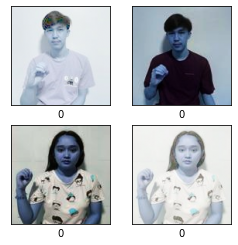

In [ ]:
plt.figure(figsize=(4,4))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(labels[train_labels[i]])
plt.show()

In [ ]:
%tensorflow_version 1.x
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras import Sequential

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
img_rows, img_cols = 128,128
input_shape = (img_rows, img_cols, 3)
num_classes = 10

indian_model = Sequential()
#1. CNN LAYER
indian_model.add(Conv2D(filters=16, kernel_size=(3, 3), padding = 'Same',activation='relu',input_shape=input_shape))

#2. CNN LAYER
indian_model.add(Conv2D(16, (3, 3) , activation='relu'))
indian_model.add(MaxPooling2D(pool_size=(2, 2)))
indian_model.add(Dropout(0.5))

#FULLY CONNECTED LAYER
indian_model.add(Flatten())
indian_model.add(Dense(64, activation='relu'))

#OUTPUT LAYER
indian_model.add(Dense(num_classes, activation='softmax'))
indian_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63504)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4064320   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
train_images.shape

(14723, 128, 128, 3)

In [ ]:
val_images.shape

(1837, 128, 128, 3)

In [ ]:
test_images.shape

(1848, 128, 128, 3)

In [ ]:
train_labels.shape

(14723,)

In [ ]:
indian_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # ต้องใช้SGD

In [ ]:
import time
from keras.models import Model, load_model

In [ ]:
start = time.time()
history = indian_model.fit(train_images, train_labels,batch_size=224,epochs=20,verbose=1,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/20
66/66 [==============================] - 296s 4s/step - loss: 2.7016 - accuracy: 0.1127 - val_loss: 2.2736 - val_accuracy: 0.1470
Epoch 2/20
66/66 [==============================] - 297s 4s/step - loss: 2.2211 - accuracy: 0.1934 - val_loss: 2.1809 - val_accuracy: 0.2101
Epoch 3/20
66/66 [==============================] - 297s 4s/step - loss: 2.0385 - accuracy: 0.2902 - val_loss: 2.1008 - val_accuracy: 0.2586
Epoch 4/20
66/66 [==============================] - 297s 5s/step - loss: 1.8231 - accuracy: 0.3770 - val_loss: 1.9482 - val_accuracy: 0.3146
Epoch 5/20
66/66 [==============================] - 302s 5s/step - loss: 1.6428 - accuracy: 0.4488 - val_loss: 1.8979 - val_accuracy: 0.3468
Epoch 6/20
66/66 [==============================] - 303s 5s/step - loss: 1.4618 - accuracy: 0.5140 - val_loss: 1.9522 - val_accuracy: 0.3489
Epoch 7/20
66/66 [==============================] - 304s 5s/step - loss: 1.3405 - accuracy: 0.5601 - val_loss: 1.8969 - val_accuracy: 0.3909
Epoch 8/20
66

In [ ]:
test_loss, test_acc = indian_model.evaluate(test_images, test_labels,verbose=2)
print('test_acc:', test_acc)

58/58 - 10s - loss: 3.1484 - accuracy: 0.3891
test_acc: 0.38906925916671753


In [ ]:
training_time = end-start
print(f'Traning time (s) : {training_time}')

Traning time (s) : 6085.263072967529


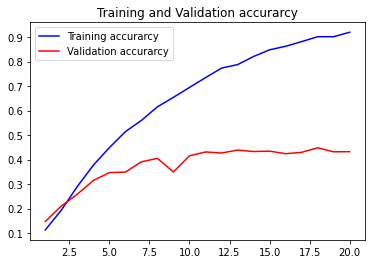

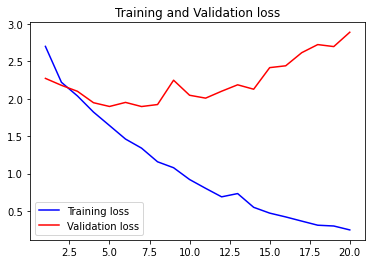

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# This will save CNN architecture in 'my_model' directory
indian_model.save('/content/drive/My Drive/All Dataset/Dataset09/my_model2')

INFO:tensorflow:Assets written to: /content/drive/My Drive/All Dataset/Dataset09/my_model2/assets


#Predict

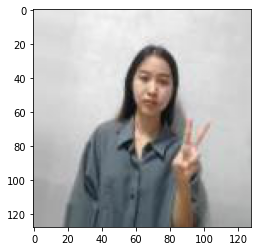

(1, 128, 128, 3)


In [ ]:
# Load image to visualize intermediate activations
from keras.preprocessing import image
img_path = '/content/drive/My Drive/All Dataset/Dataset09/Dataset0-9_test/test/2/aug__0_20.jpg'
img = image.load_img(img_path, target_size=(img_size, img_size))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
# predicting images
labels = ['0', '1', '2','3','4','5','6','7','8','9']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = indian_model.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: 7


#Visualize

In [ ]:
%cd '/content/drive/MyDrive/All Dataset/ThaiSignLanguage/'

/content/drive/MyDrive/All Dataset/ThaiSignLanguage


filtered image

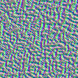

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


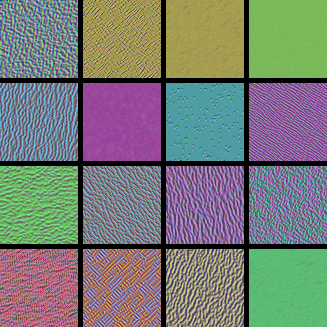

In [ ]:
#from google.colab import files
#src = list(files.upload().values())[0]
#open('/content/drive/My Drive/All Dataset/ThaiSignLanguage/visualize_filter.py','wb').write(src)

import visualize_filter
LayerName = 'conv2d'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

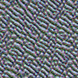

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


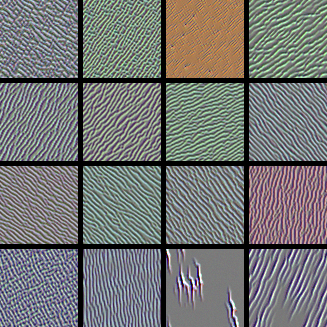

In [ ]:
LayerName = 'conv2d_1'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

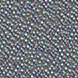

AttributeError: ignored

In [ ]:
LayerName = 'max_pooling2d'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

filter

In [ ]:
from tensorflow.keras import datasets, layers, models

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 0 , Shape : (1, 128, 128, 16)


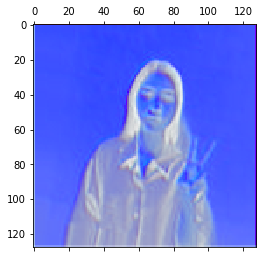

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 1 , Shape : (1, 126, 126, 16)


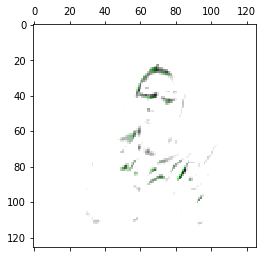

Layer # 2 , Shape : (1, 63, 63, 16)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


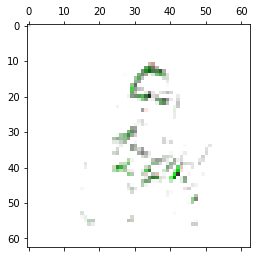

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 3 , Shape : (1, 63, 63, 16)


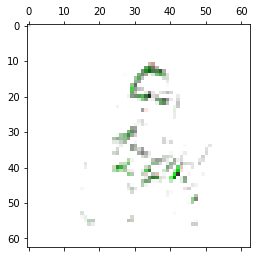

In [ ]:
# Visualize intermediate activations
layer_outputs = [layer.output for layer in indian_model.layers]
 # Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=indian_model.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 
i = 0
for act in activations:
  if(len(act.shape) == 4): # Show only convolution and pooling layers
    print('Layer #', i, ', Shape :', act.shape)
    i += 1
    plt.matshow(act.squeeze()[ :, :, 0:4])
    plt.show()

In [ ]:
commit test